The dataset used includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

AIM: Building a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset:
df=pd.read_csv('C:/Users/Azhar1/Documents/FlipRobo/Project_Evaluation/Project_Phase 2/loan_prediction.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

The dimension of our data is 614 rows * 13 columns

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

1. We can see 4 colunms are float, 1 is interger and 8 are object type.
2. Loan ID is unique ID it is Object type. Gender, Married, Dependents, Education, Self_Employed, Property_Area and Loan_Status are categorical values
3. We can see that Dependents cannot be a object, we will convert it into a numerical data in further steps.
4. ApplicantIncome, CoapplicantIncome,LoanAmount, Loan_Amount_Term, Credit_History are Continuous data.

In [7]:
# Dropping Loan ID column, as its not required for model building.
df.drop('Loan_ID', axis=1, inplace= True)

In [8]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [11]:
#printing the unique values available in the dataset

for i in df.columns:
    print(df[i].value_counts())
    print('*'*75)

Male      489
Female    112
Name: Gender, dtype: int64
***************************************************************************
Yes    398
No     213
Name: Married, dtype: int64
***************************************************************************
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
***************************************************************************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
***************************************************************************
No     500
Yes     82
Name: Self_Employed, dtype: int64
***************************************************************************
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
***************************************************************************
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 

In [12]:
#checking the number of null values present in each columns 

df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

1. Data is having null vaues in gender, married, dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History columns.
2. Dependents column is having one value as "3+", we will convert it into "3" and convert its datatype too.

In [14]:
df.isin(["3+"]).sum()

Gender                0
Married               0
Dependents           51
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
df.replace(to_replace="3+", value='3', inplace= True)

In [16]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
# Filling null values

df['Gender'].fillna(value='Male', inplace=True)
df['Married'].fillna(value='Yes', inplace=True)
df['Dependents'].fillna(value='0', inplace=True)
df['Self_Employed'].fillna(value='No', inplace=True)
df['LoanAmount'].fillna(value=df['LoanAmount'].median(), inplace= True)
df['Loan_Amount_Term'].fillna(value=df['Loan_Amount_Term'].median(), inplace= True)
df['Credit_History'].fillna(value=df['Credit_History'].median(), inplace= True)

In [19]:
#checking null values 

df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We can see that there are no null values in our data now.

In [20]:
# Chagning data type of Dependents column

df['Dependents']=df['Dependents'].astype(str).astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.3+ KB


# Data Visualization

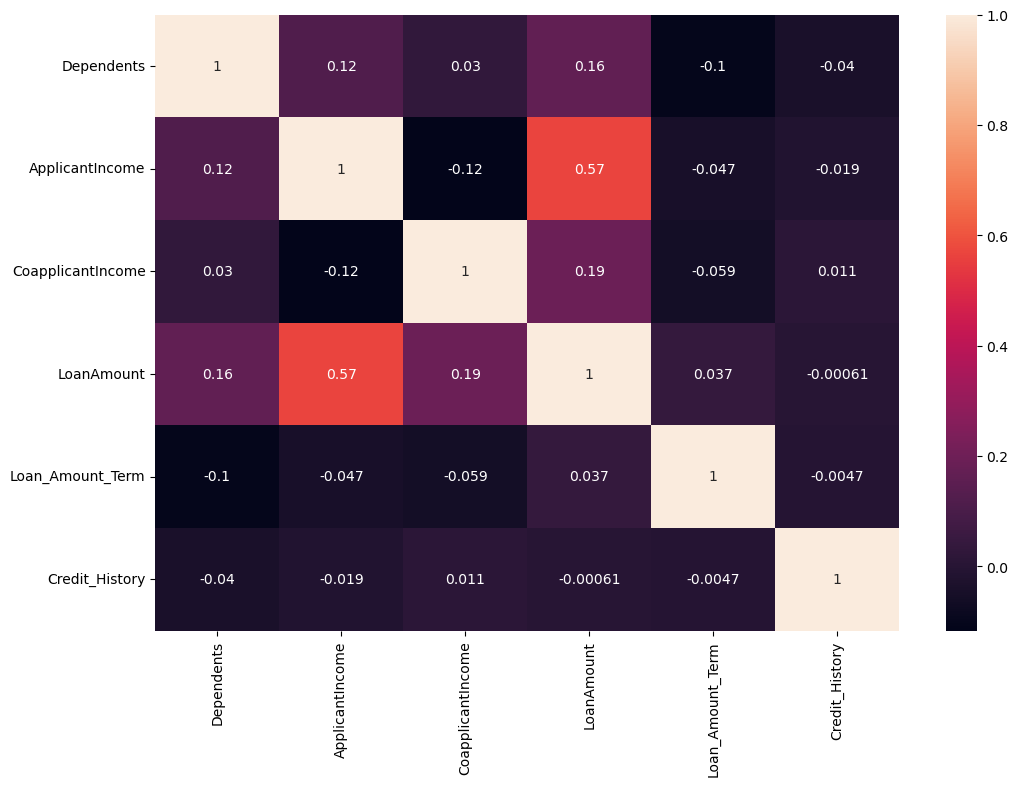

In [22]:
#Showing the attributes are related to each other can be seen by plotting the heatmap over the attributes correlation value
corr = df.corr()
plt.figure(figsize=(12,8), facecolor='white')
sns.heatmap(corr, annot=True)
plt.show()

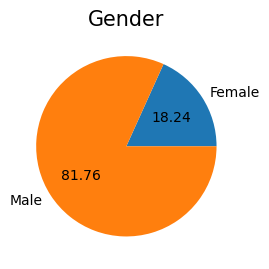

In [25]:
plt.subplot(1,2,2)
df.groupby('Gender').size().plot(kind='pie', autopct='%.2f')
plt.title('Gender', fontsize=15)
plt.show()

We can see 81.76 percent of Applicants are Male and 18.24 percent applicants are Female.

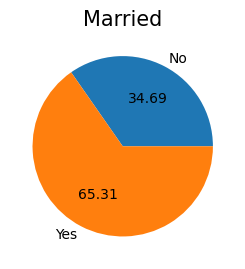

In [26]:
plt.subplot(1,2,2)
df.groupby('Married').size().plot(kind='pie', autopct='%.2f')
plt.title('Married', fontsize=15)
plt.show()

We can see 65.31 percent of applicants are married and 34.69 percent are unmarried.

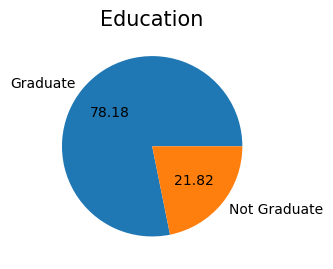

In [27]:
plt.subplot(1,2,2)
df.groupby('Education').size().plot(kind='pie', autopct='%.2f')
plt.title('Education', fontsize=15)
plt.show()

Most of the applicatnts are Graduate with 78.18 percent.

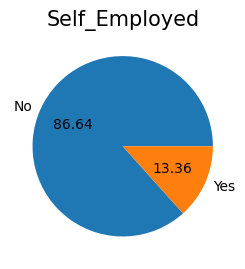

In [29]:
plt.subplot(1,2,2)
df.groupby('Self_Employed').size().plot(kind='pie', autopct='%.2f')
plt.title('Self_Employed', fontsize=15)
plt.show()

Pie chart indicates 86.64 percent of the applicants are not self_employed.
Only 13.36 Applicants are self employed.

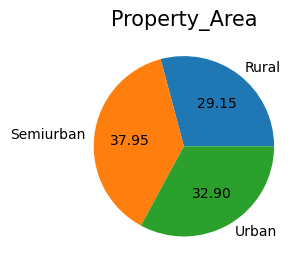

In [30]:
plt.subplot(1,2,2)
df.groupby('Property_Area').size().plot(kind='pie', autopct='%.2f')
plt.title('Property_Area', fontsize=15)
plt.show()

Here we can see Semiurban applicants are more when compared with others.

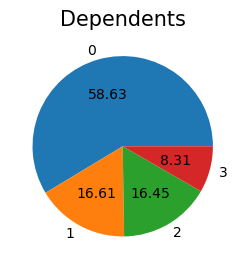

In [32]:
plt.subplot(1,2,2)
df.groupby('Dependents').size().plot(kind='pie', autopct='%.2f')
plt.title('Dependents', fontsize=15)
plt.show()

In [34]:
num_features= df.select_dtypes(include=[np.number])
num_features.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,5849,0.0,128.0,360.0,1.0
1,1,4583,1508.0,128.0,360.0,1.0
2,0,3000,0.0,66.0,360.0,1.0
3,0,2583,2358.0,120.0,360.0,1.0
4,0,6000,0.0,141.0,360.0,1.0


Text(0.5, 1.0, 'ApplicantIncome')

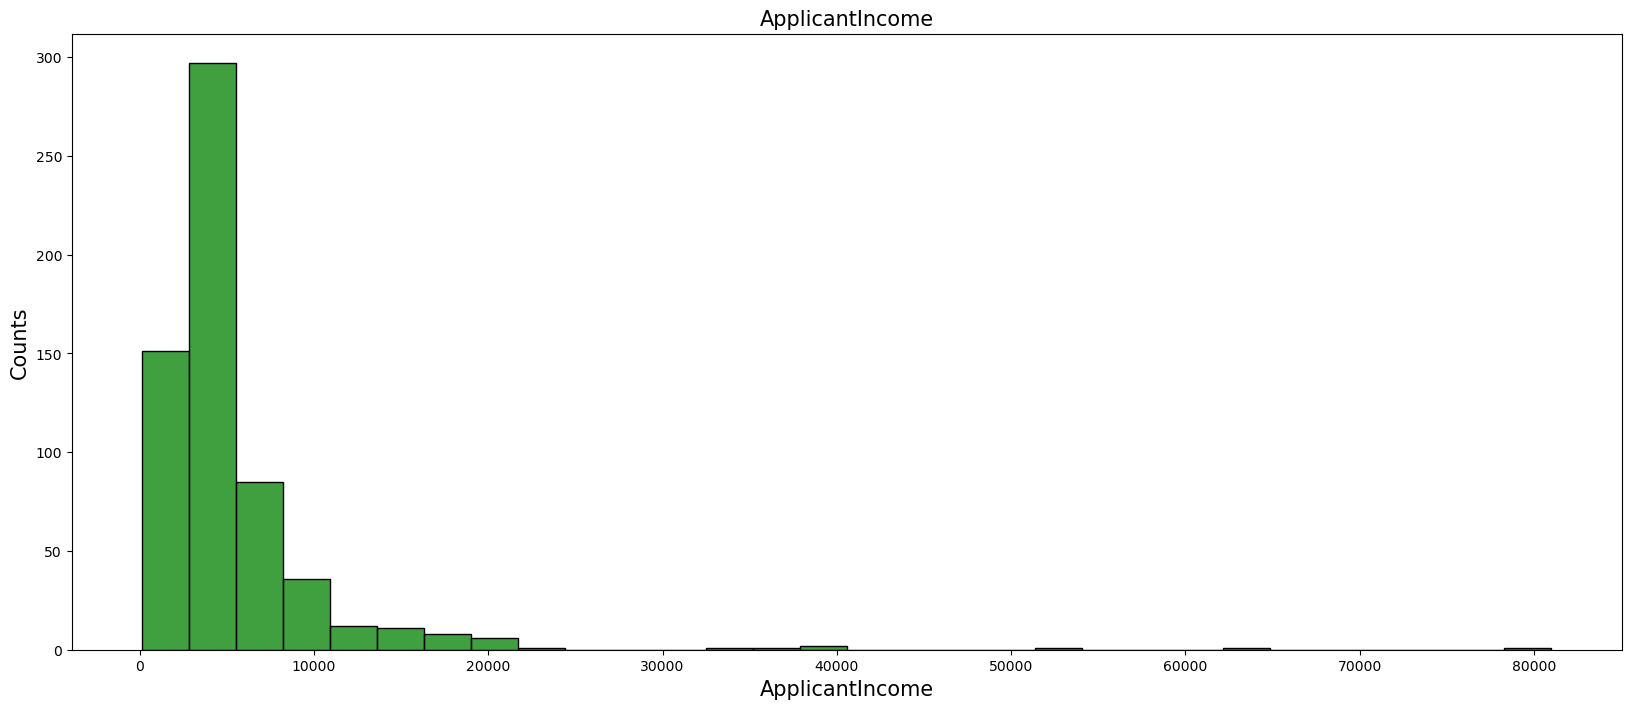

In [35]:
plt.figure(figsize=(20,8))
sns.histplot(num_features['ApplicantIncome'], bins= 30, color='g')
plt.xlabel('ApplicantIncome', fontsize=15 )
plt.ylabel('Counts', fontsize=15 )
plt.title('ApplicantIncome', fontsize=15)

Most of the applicants falls under 10000.

Text(0.5, 1.0, 'CoapplicantIncome')

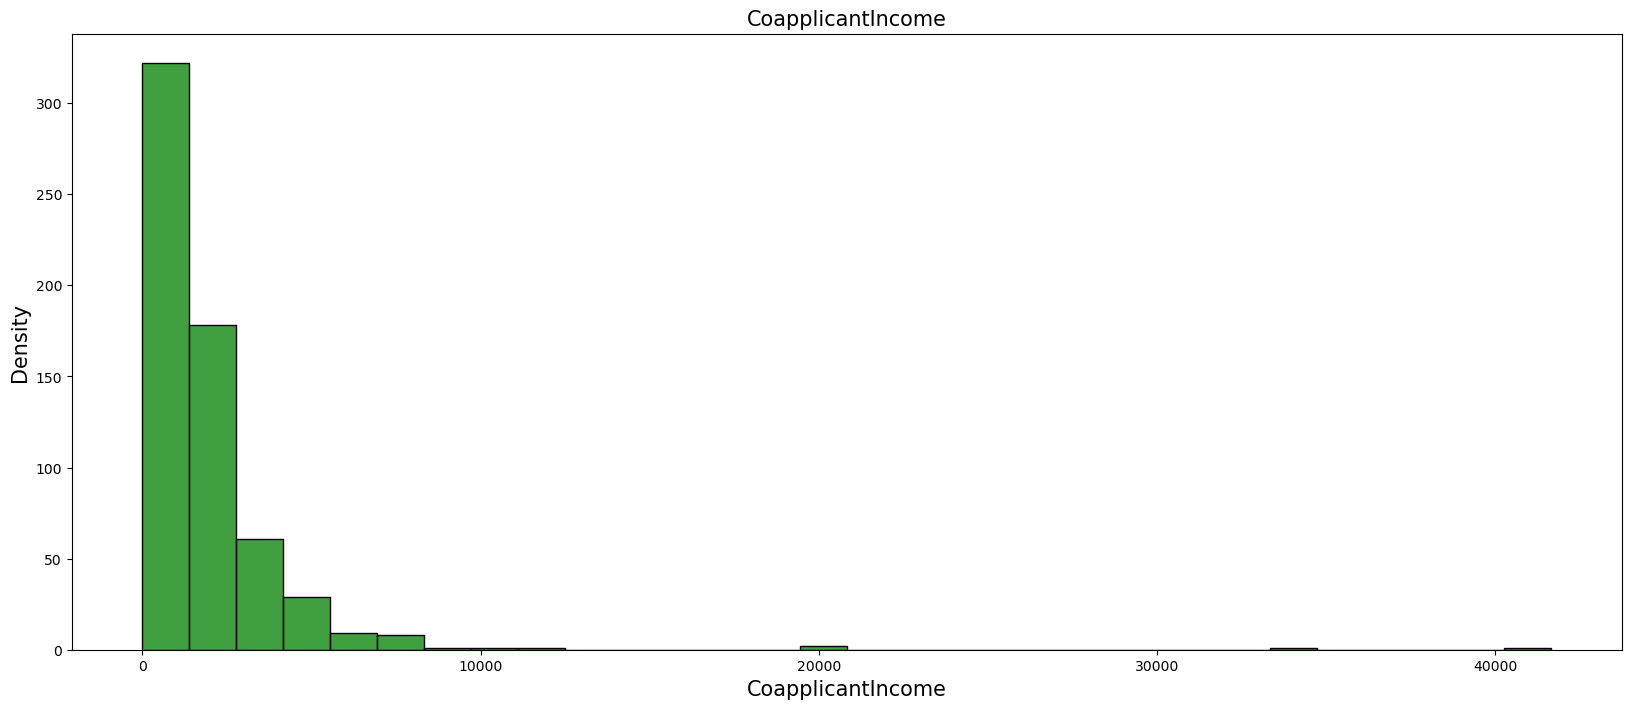

In [36]:
plt.figure(figsize=(20,8))
sns.histplot(num_features['CoapplicantIncome'], bins= 30, color='g')
plt.xlabel('CoapplicantIncome', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('CoapplicantIncome', fontsize=15)

we can see coapplicants income is very less as compare to applicants income at the same time numbers also very less.

Text(0.5, 1.0, 'LoanAmount')

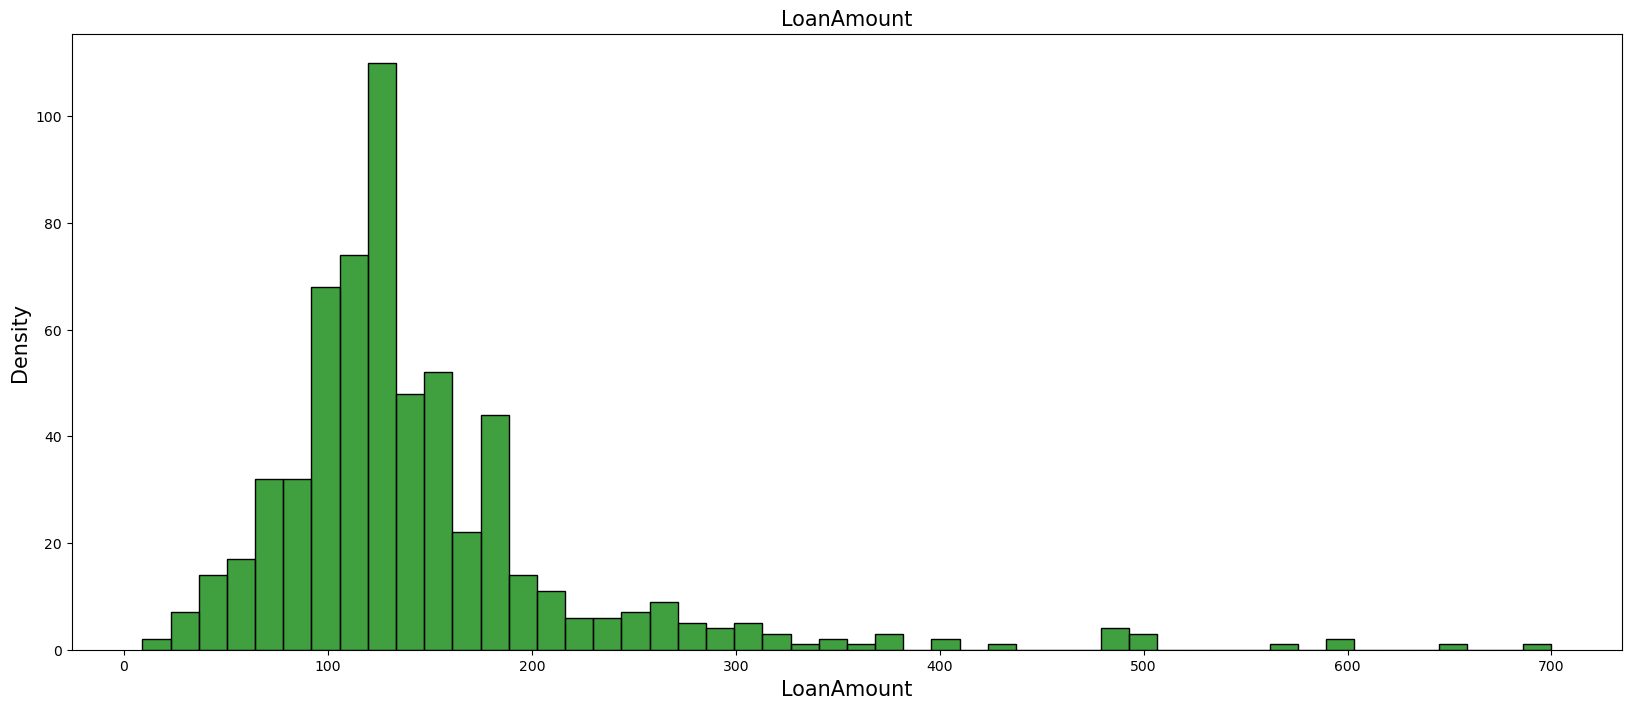

In [37]:
plt.figure(figsize=(20,8))
sns.histplot(num_features['LoanAmount'], bins= 50, color='g')
plt.xlabel('LoanAmount', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('LoanAmount', fontsize=15)

We can see most of the applicants apply loan in the range of 100-200, Loan number of applicants for loan values greater than 200 are less.

Text(0.5, 1.0, 'Loan_Amount_Term')

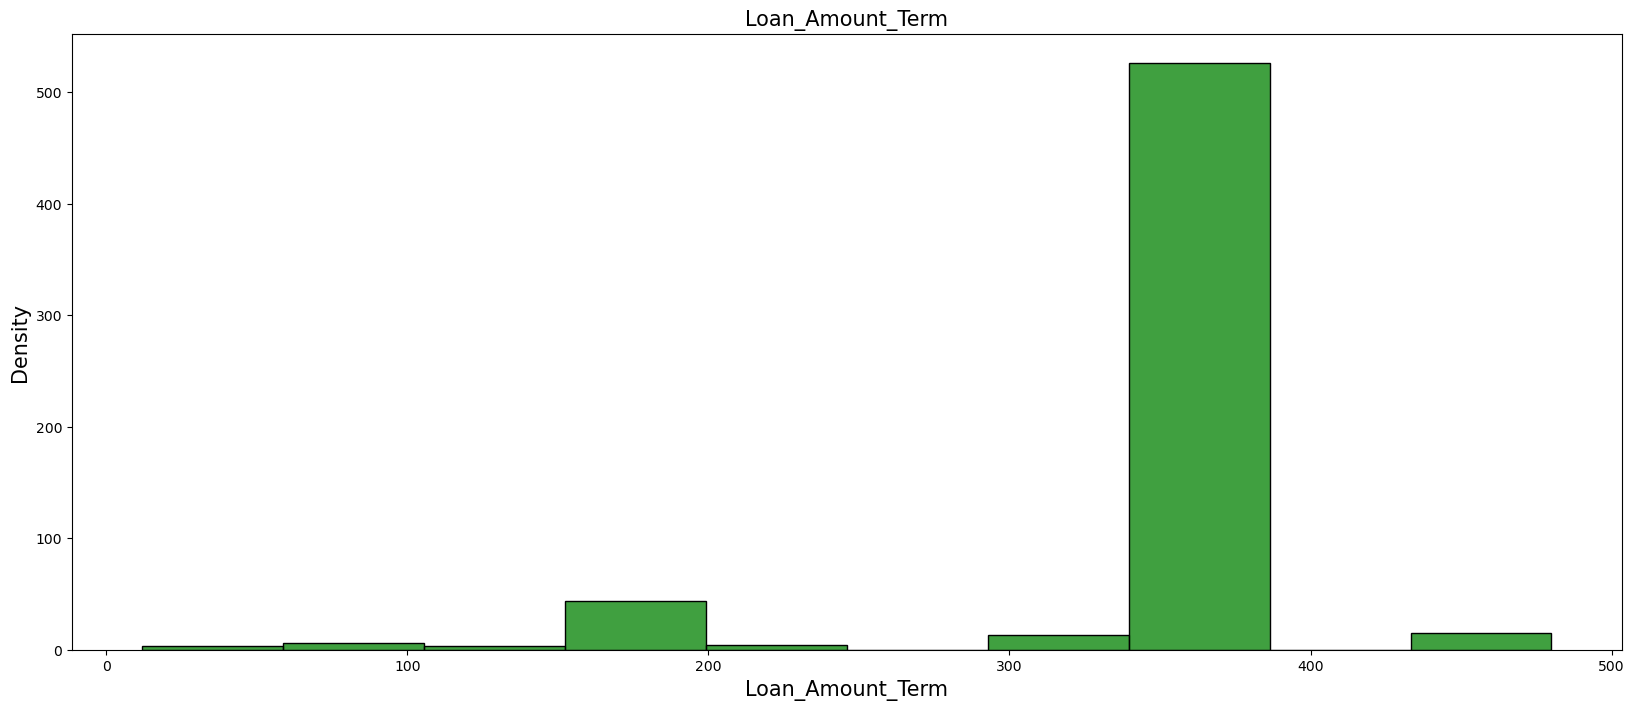

In [39]:
plt.figure(figsize=(20,8))
sns.histplot(num_features['Loan_Amount_Term'], bins= 10, color='g')
plt.xlabel('Loan_Amount_Term', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('Loan_Amount_Term', fontsize=15)

We can see most of the loan terms are lie bwteen 350-400 range,
applicant with Loan_Amont_term 350 are high in number.

In [41]:
plt.figure(figsize=(20,8))
sns.countplot(df['Gender'], hue='Loan_Status', data= df)
plt.xlabel('Gender', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

TypeError: countplot() got multiple values for argument 'data'

<Figure size 2000x800 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

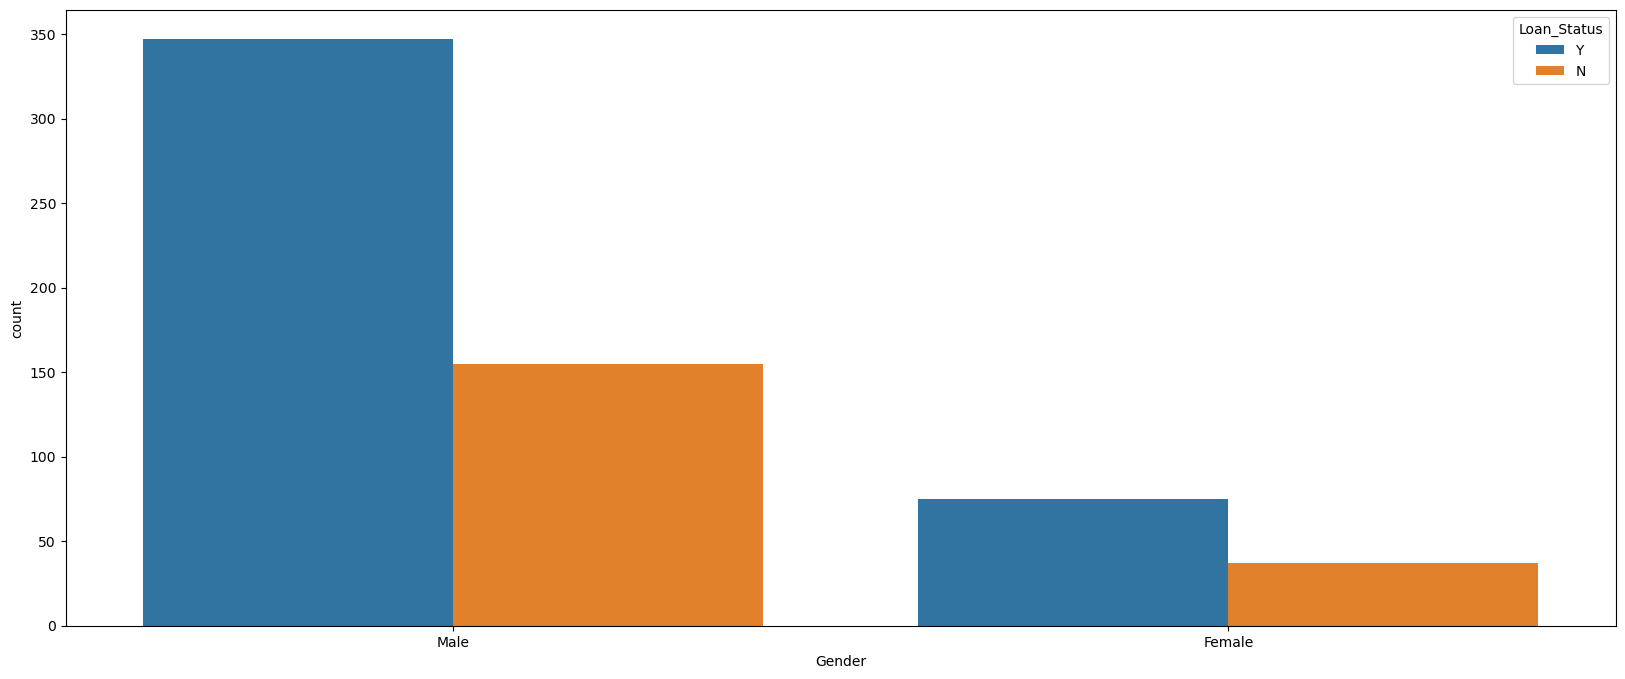

In [44]:
plt.figure(figsize=(20,8))
sns.countplot(df,x='Gender',hue='Loan_Status')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

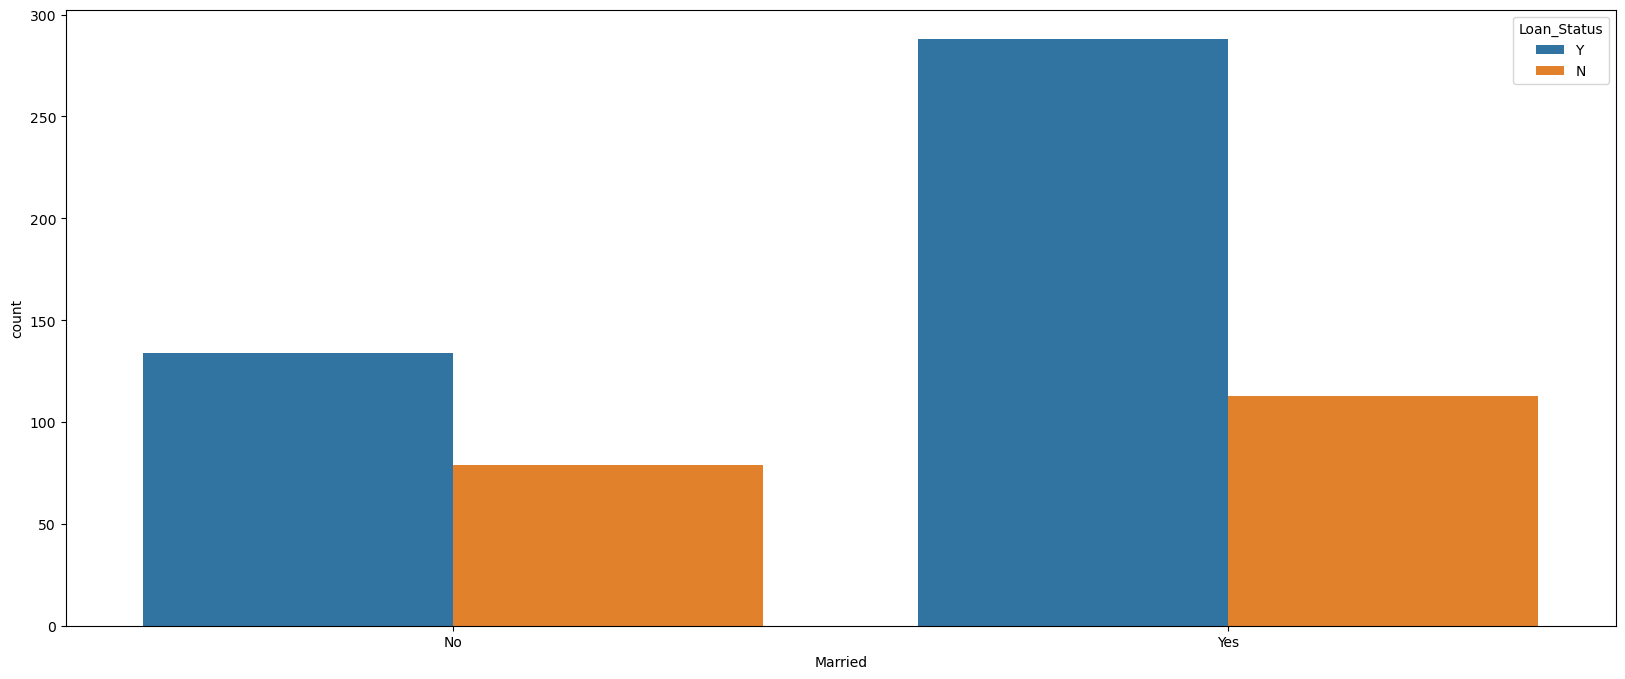

In [45]:
plt.figure(figsize=(20,8))
sns.countplot(df,x='Married',hue='Loan_Status')
plt.show

We can see mostly marrieed pepole apply for loan and count for getting loan is high as compared to Non- married.

<function matplotlib.pyplot.show(close=None, block=None)>

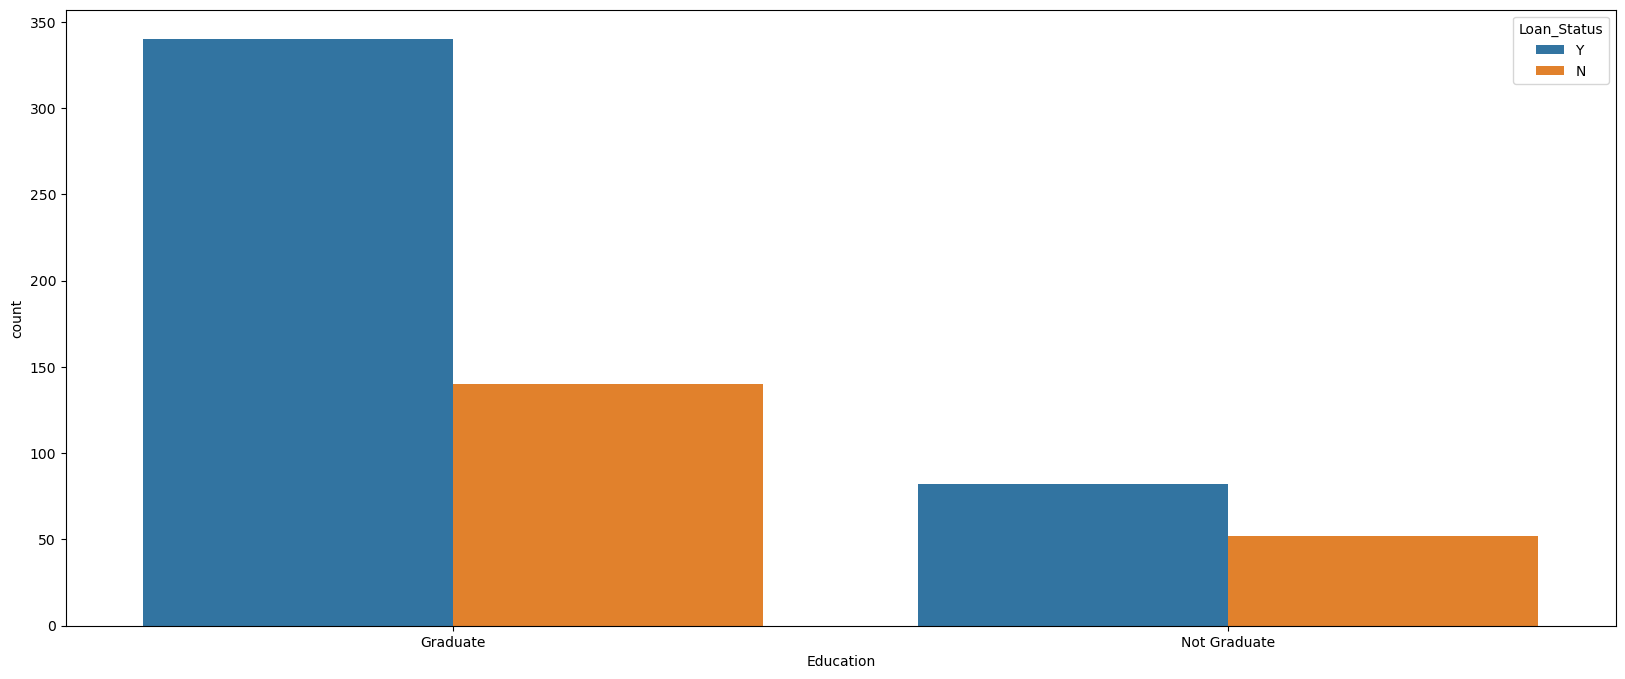

In [46]:
plt.figure(figsize=(20,8))
sns.countplot(df,x='Education',hue='Loan_Status')
plt.show

We can see Graduate Applicants are more and getting approval also more for Graduate applicants.

<function matplotlib.pyplot.show(close=None, block=None)>

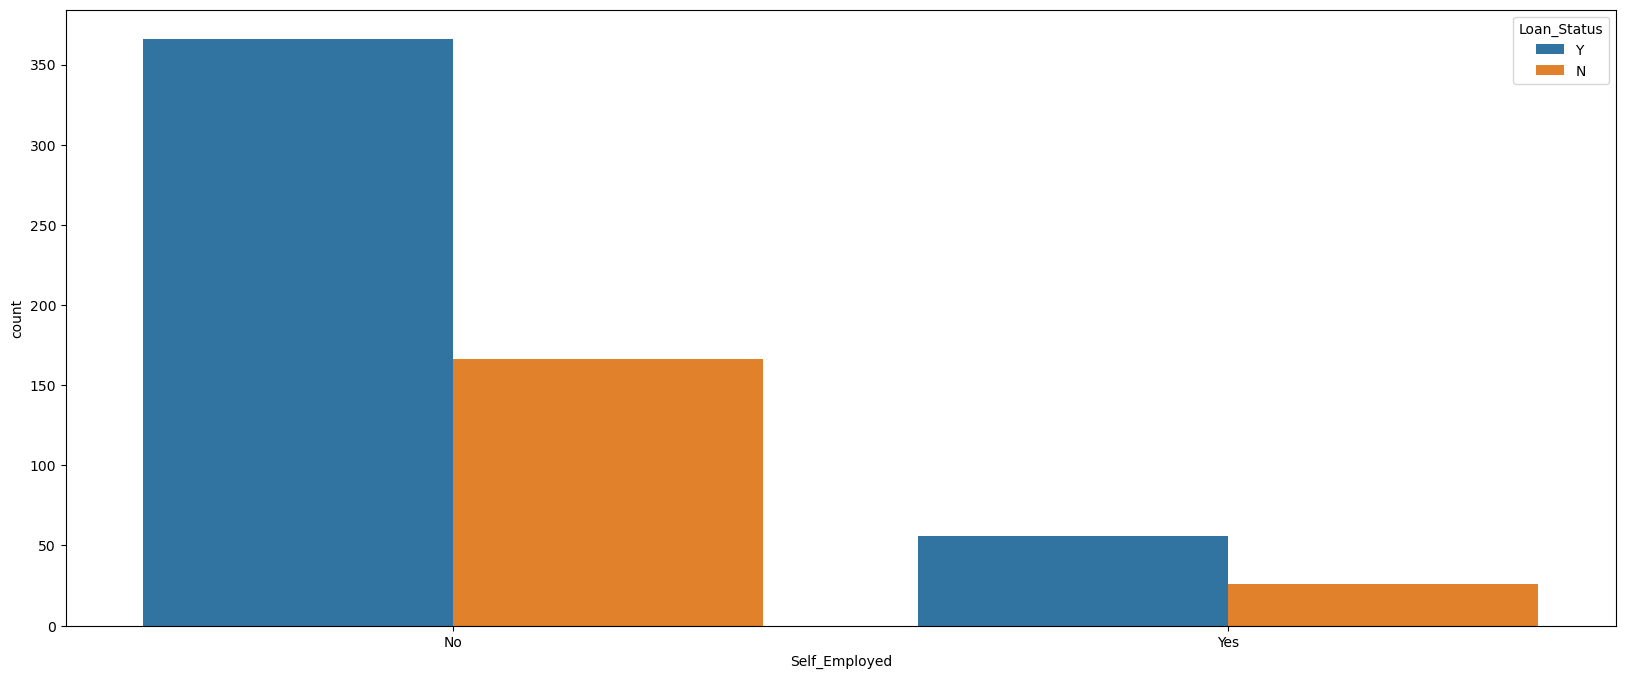

In [47]:
plt.figure(figsize=(20,8))
sns.countplot(df,x='Self_Employed',hue='Loan_Status')
plt.show

We can see self_employed applicants are less, the change for getting approval is low for Self_employed applicants.

<function matplotlib.pyplot.show(close=None, block=None)>

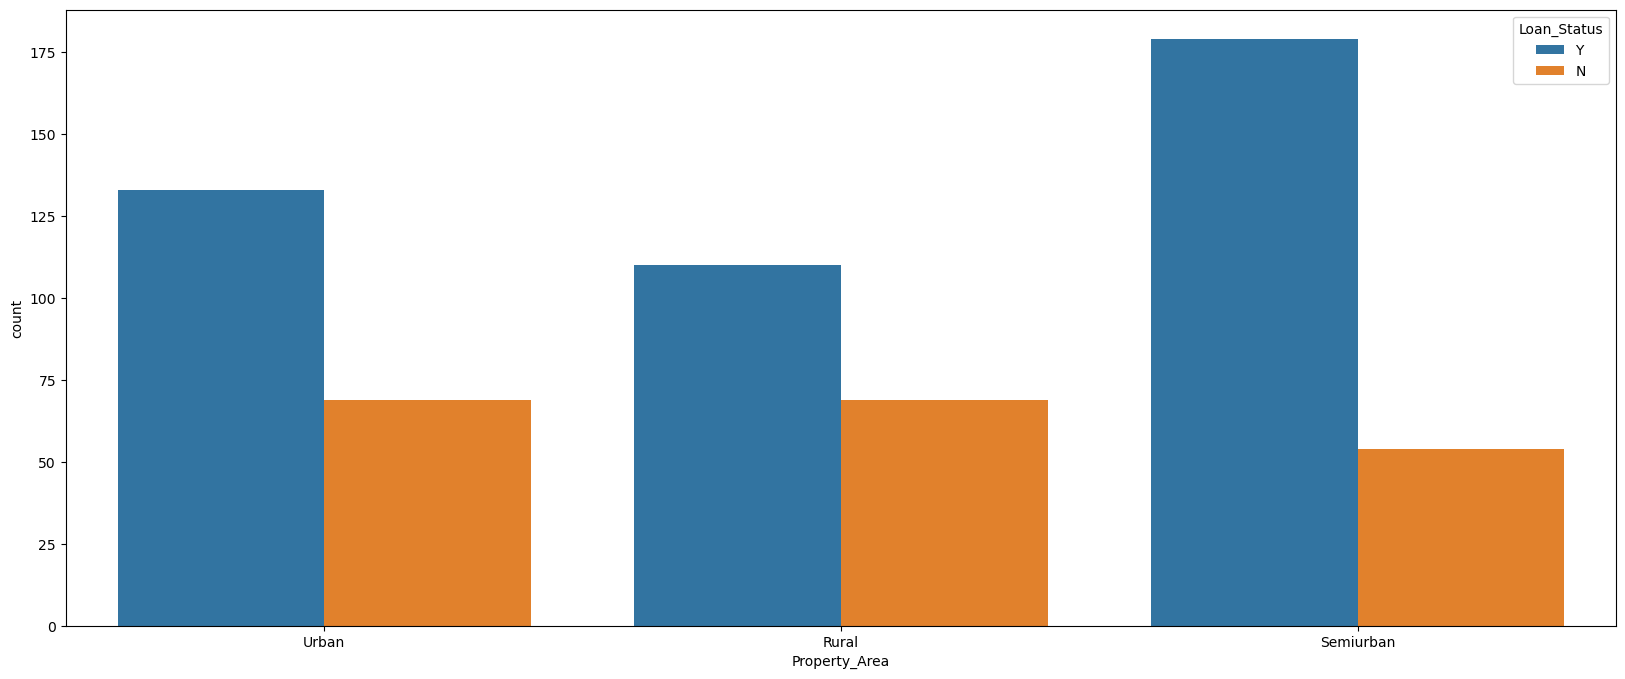

In [48]:
plt.figure(figsize=(20,8))
sns.countplot(df,x='Property_Area',hue='Loan_Status')
plt.show

We can see Applicants from Semiurban area are having higher chance for approval as numbers are high as compare to other Area.

<function matplotlib.pyplot.show(close=None, block=None)>

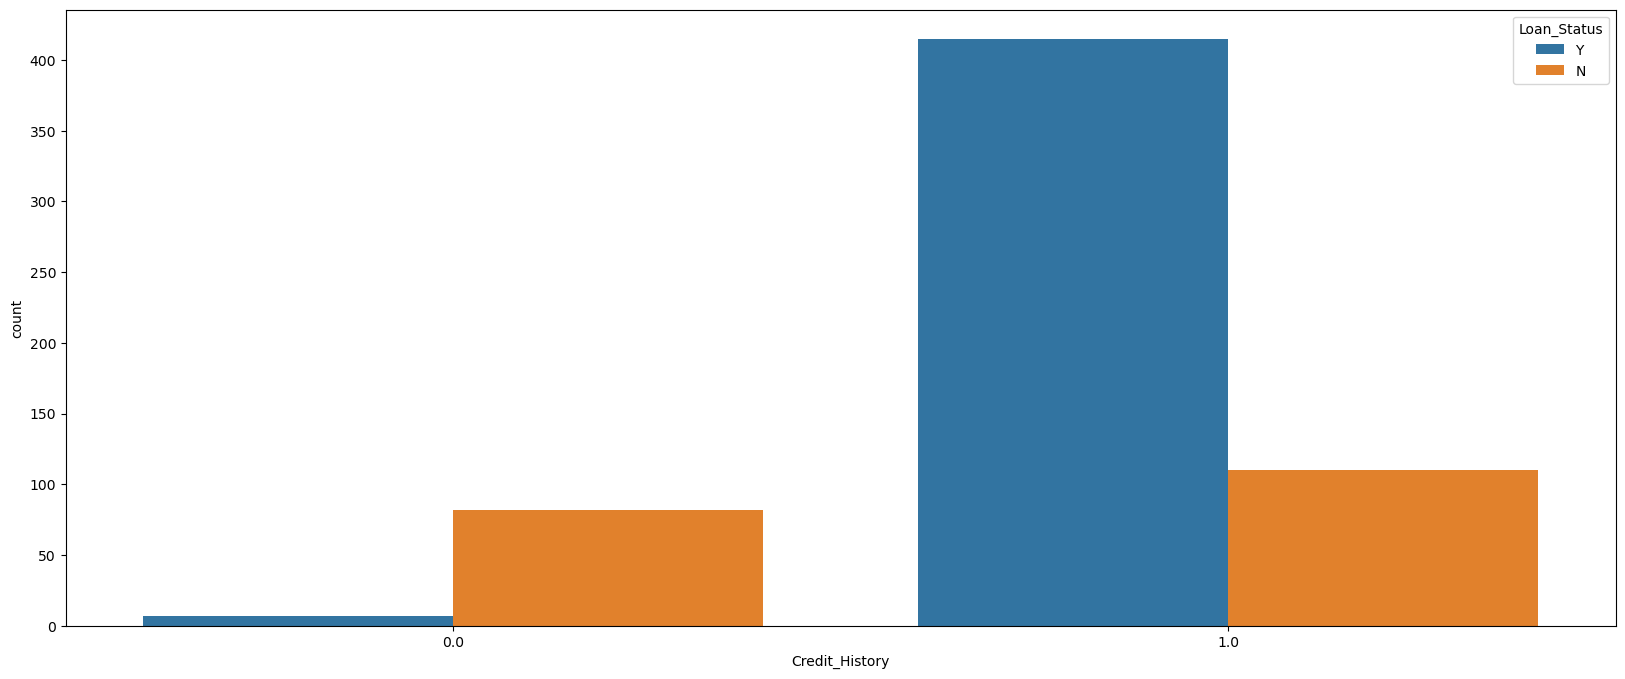

In [49]:
plt.figure(figsize=(20,8))
sns.countplot(df,x='Credit_History',hue='Loan_Status')
plt.show

We can see Applicant having create histry, having good chance for approval.

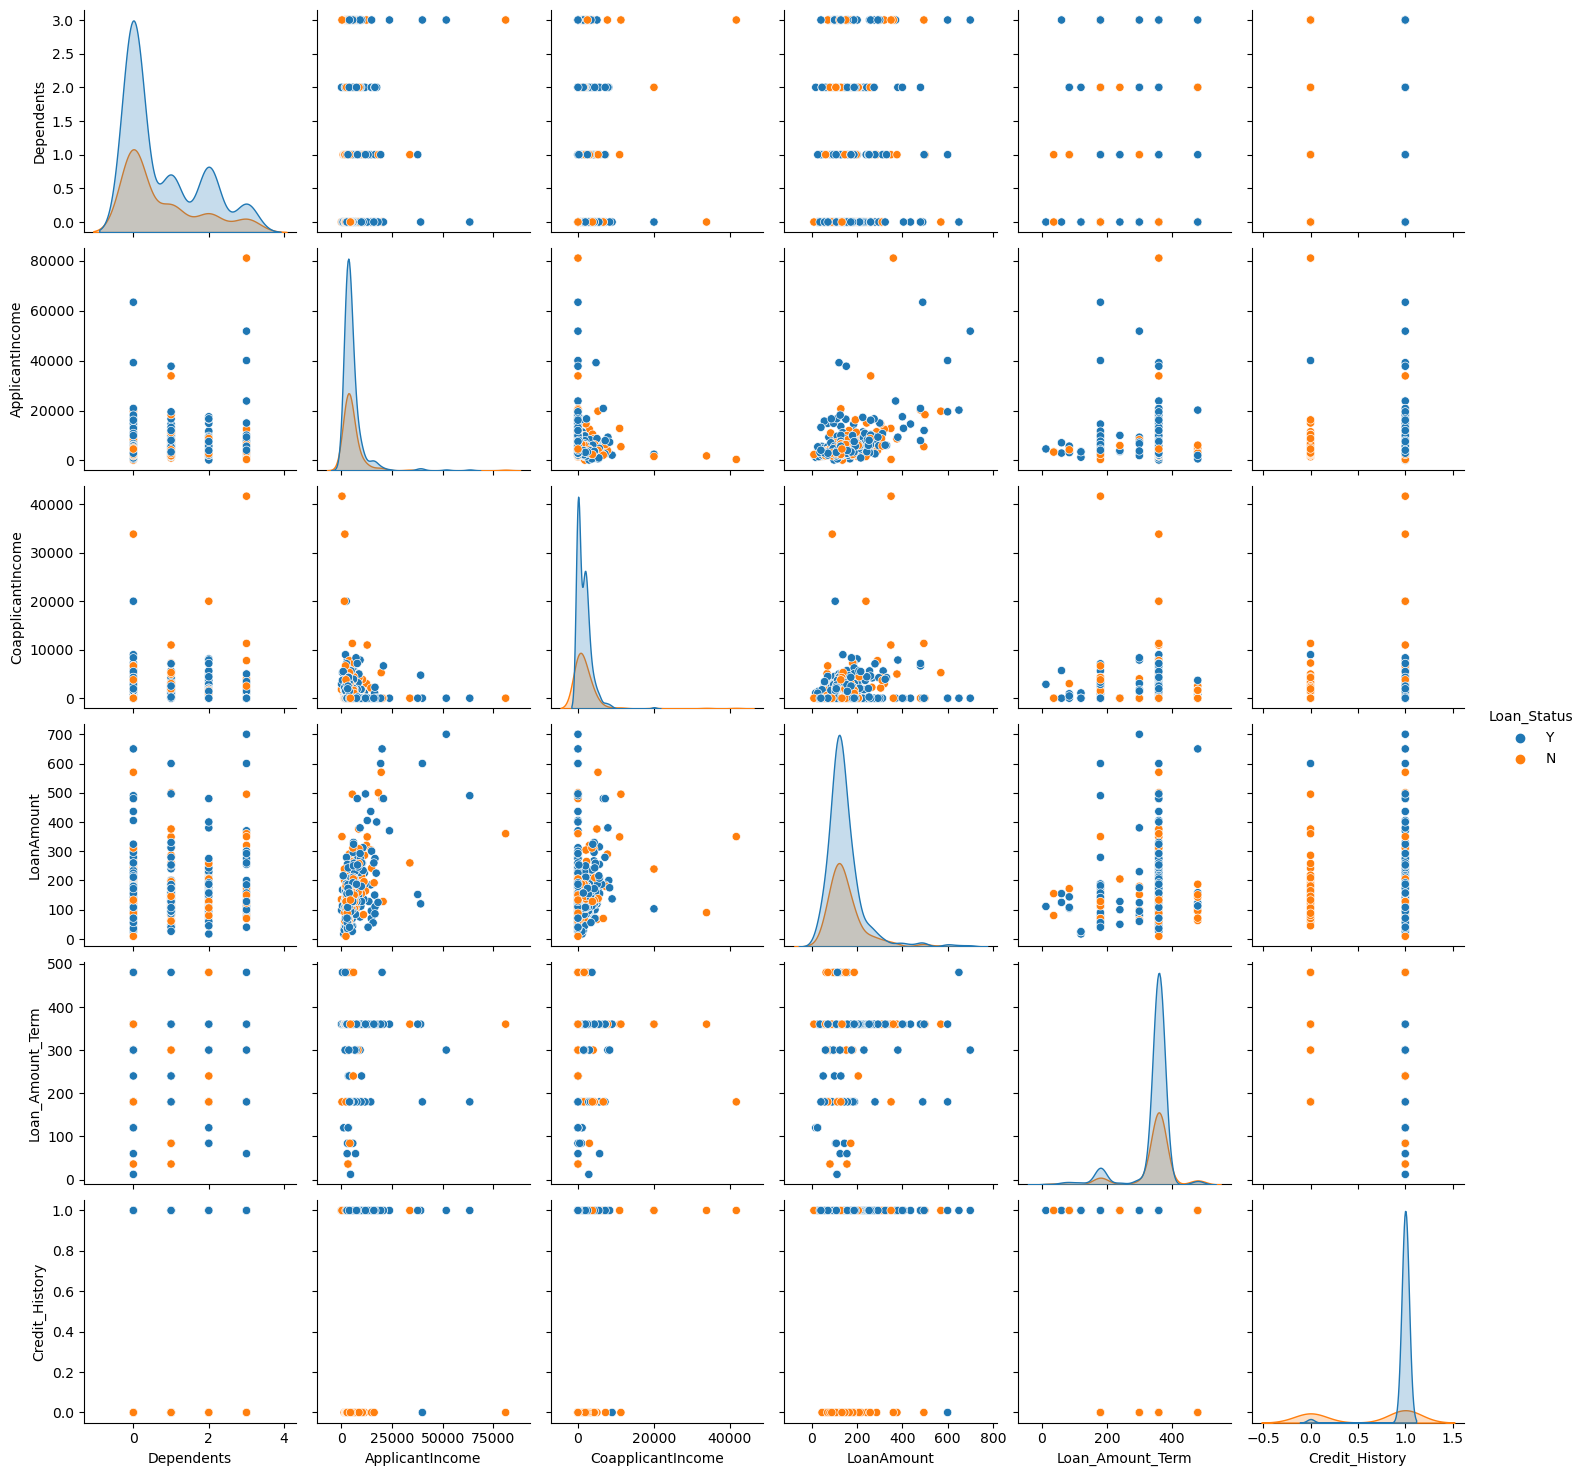

In [54]:
sns.pairplot(data=df, hue='Loan_Status')

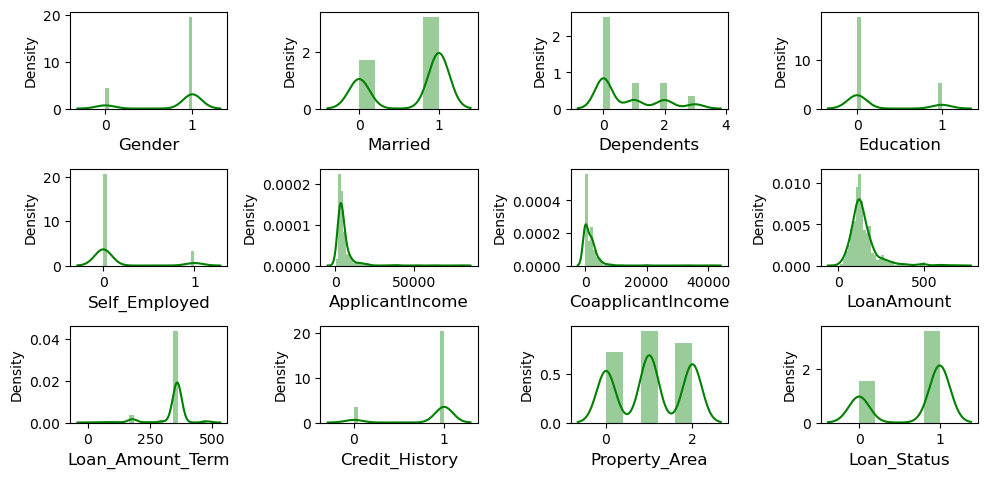

In [59]:
# Visualizing data distribution
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in df.columns:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[col],color='g')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()  

In [56]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df1=LE.fit_transform(df['Gender'])
df2 = LE.fit_transform(df['Married'])
df3=LE.fit_transform(df['Education'])
df4 = LE.fit_transform(df['Self_Employed'])
df5=LE.fit_transform(df['Property_Area'])
df6 = LE.fit_transform(df['Loan_Status'])

In [57]:
df['Gender']=df1
df['Married']=df2
df['Education']=df3
df['Self_Employed']=df4
df['Property_Area']=df5
df['Loan_Status']=df6

In [58]:
#checking the datatypes again
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

<Axes: xlabel='Loan_Status', ylabel='count'>

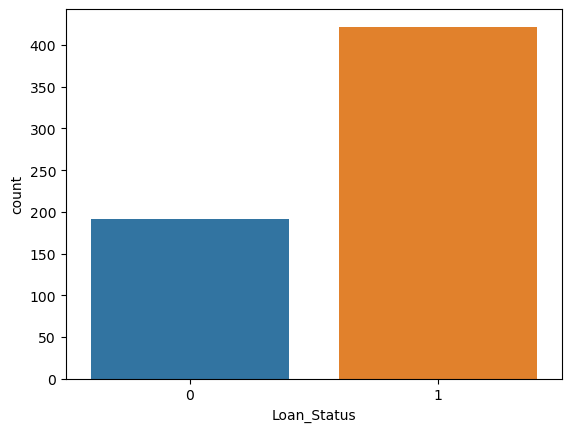

In [61]:
sns.countplot(data=df,x='Loan_Status')

We can see our output is not balanced we will now use SMOTE to balance the output.

In [64]:
# Dividing into Feature and Target data
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [67]:
from sklearn.preprocessing import StandardScaler
SDC=StandardScaler()
x=SDC.fit_transform(x)

In [63]:
from imblearn.over_sampling import SMOTE

In [68]:
X,Y=SMOTE(k_neighbors=3).fit_resample(x,y)

In [70]:
X.shape

(844, 11)

In [72]:
Y.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [73]:
dfa=pd.DataFrame(data=X,columns=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'])

In [74]:
x=dfa
y=Y

In [76]:
x.shape

(844, 11)

In [77]:
y.shape

(844,)

# Finding Best Random State

In [78]:
#Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state= i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best Accuracy is ',maxAccu,'at random state ',maxRS)

Best Accuracy is  0.8582677165354331 at random state  73


# Training & Testing of Data

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=73)

# Applying various models

In [83]:
# Using Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_auc_score,precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split

lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predlg),'%')

for i in range(2,11):
    cvs = cross_val_score(lg,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predlg))
print('\n Classification Report: \n',classification_report(y_test,predlg))

Accuracy score is:  0.7204724409448819 %
Cross Validation Score for cv= 2 is 0.7061611374407583
Cross Validation Score for cv= 3 is 0.6931172862875746
Cross Validation Score for cv= 4 is 0.6931279620853081
Cross Validation Score for cv= 5 is 0.7002324598478445
Cross Validation Score for cv= 6 is 0.6954660587639311
Cross Validation Score for cv= 7 is 0.6954643841007477
Cross Validation Score for cv= 8 is 0.701358939802336
Cross Validation Score for cv= 9 is 0.7001830244795242
Cross Validation Score for cv= 10 is 0.6990196078431372

 Confusion Matrix: 
 [[ 66  59]
 [ 12 117]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.53      0.65       125
           1       0.66      0.91      0.77       129

    accuracy                           0.72       254
   macro avg       0.76      0.72      0.71       254
weighted avg       0.75      0.72      0.71       254



In [87]:
# Using SVC model:

from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predsvc),'%')

for i in range(2,15):
    cvs = cross_val_score(svc,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predsvc))
print('\n Classification Report: \n',classification_report(y_test,predsvc))

Accuracy score is:  0.7322834645669292 %
Cross Validation Score for cv= 2 is 0.7381516587677726
Cross Validation Score for cv= 3 is 0.7144569798844046
Cross Validation Score for cv= 4 is 0.7227488151658767
Cross Validation Score for cv= 5 is 0.7191744153282615
Cross Validation Score for cv= 6 is 0.7263171225937183
Cross Validation Score for cv= 7 is 0.7286993309720583
Cross Validation Score for cv= 8 is 0.7310871518418689
Cross Validation Score for cv= 9 is 0.7262640128117136
Cross Validation Score for cv= 10 is 0.7287675070028012
Cross Validation Score for cv= 11 is 0.7274746784316162
Cross Validation Score for cv= 12 is 0.7286720321931591
Cross Validation Score for cv= 13 is 0.7381471893491125
Cross Validation Score for cv= 14 is 0.7323380171740829

 Confusion Matrix: 
 [[ 70  55]
 [ 13 116]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.56      0.67       125
           1       0.68      0.90      0.77       129

   

In [88]:
# Using KNN model:

from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predkn),'%')

for i in range(2,15):
    cvs = cross_val_score(kn,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predkn))
print('\n Classification Report: \n',classification_report(y_test,predkn))

Accuracy score is:  0.7598425196850394 %
Cross Validation Score for cv= 2 is 0.7417061611374408
Cross Validation Score for cv= 3 is 0.7452655578270782
Cross Validation Score for cv= 4 is 0.7488151658767773
Cross Validation Score for cv= 5 is 0.7559312482389405
Cross Validation Score for cv= 6 is 0.7618456602499156
Cross Validation Score for cv= 7 is 0.7690181031090122
Cross Validation Score for cv= 8 is 0.7595575022461815
Cross Validation Score for cv= 9 is 0.7653727852766975
Cross Validation Score for cv= 10 is 0.7596358543417366
Cross Validation Score for cv= 11 is 0.758326601628037
Cross Validation Score for cv= 12 is 0.7631790744466801
Cross Validation Score for cv= 13 is 0.7642381656804733
Cross Validation Score for cv= 14 is 0.767935206869633

 Confusion Matrix: 
 [[98 27]
 [34 95]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.78      0.76       125
           1       0.78      0.74      0.76       129

    accur

In [89]:
# Using Decision Tree model:

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,preddtc),'%')

for i in range(2,15):
    cvs = cross_val_score(dtc,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,preddtc))
print('\n Classification Report: \n',classification_report(y_test,preddtc))

Accuracy score is:  0.7795275590551181 %
Cross Validation Score for cv= 2 is 0.7227488151658767
Cross Validation Score for cv= 3 is 0.7370081522424976
Cross Validation Score for cv= 4 is 0.764218009478673
Cross Validation Score for cv= 5 is 0.7476683572837419
Cross Validation Score for cv= 6 is 0.7725683890577507
Cross Validation Score for cv= 7 is 0.7774104683195592
Cross Validation Score for cv= 8 is 0.7573562443845463
Cross Validation Score for cv= 9 is 0.7655380157096011
Cross Validation Score for cv= 10 is 0.7727170868347338
Cross Validation Score for cv= 11 is 0.7501398123407693
Cross Validation Score for cv= 12 is 0.7537055667337359
Cross Validation Score for cv= 13 is 0.7511834319526627
Cross Validation Score for cv= 14 is 0.7468188914910227

 Confusion Matrix: 
 [[ 97  28]
 [ 28 101]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       125
           1       0.78      0.78      0.78       129

    

In [90]:
# Using Random Forest classifier:

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
predRF=RF.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predRF),'%')

for i in range(2,15):
    cvs = cross_val_score(RF,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predRF))
print('\n Classification Report: \n',classification_report(y_test,predRF))

Accuracy score is:  0.8464566929133859 %
Cross Validation Score for cv= 2 is 0.816350710900474
Cross Validation Score for cv= 3 is 0.8128475640022548
Cross Validation Score for cv= 4 is 0.816350710900474
Cross Validation Score for cv= 5 is 0.8258734854888701
Cross Validation Score for cv= 6 is 0.8365839243498819
Cross Validation Score for cv= 7 is 0.8331168831168831
Cross Validation Score for cv= 8 is 0.8154424977538186
Cross Validation Score for cv= 9 is 0.8413660743791148
Cross Validation Score for cv= 10 is 0.8273109243697478
Cross Validation Score for cv= 11 is 0.8354098055054994
Cross Validation Score for cv= 12 is 0.8344567404426559
Cross Validation Score for cv= 13 is 0.8294378698224854
Cross Validation Score for cv= 14 is 0.8261514441842311

 Confusion Matrix: 
 [[101  24]
 [ 15 114]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       125
           1       0.83      0.88      0.85       129

    a

In [91]:
# Using AdaBoost classifier:

from sklearn.ensemble import AdaBoostClassifier
Ad=AdaBoostClassifier()
Ad.fit(x_train,y_train)
predAd=Ad.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predAd),'%')

for i in range(2,15):
    cvs = cross_val_score(Ad,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predAd))
print('\n Classification Report: \n',classification_report(y_test,predAd))

Accuracy score is:  0.7598425196850394 %
Cross Validation Score for cv= 2 is 0.7251184834123223
Cross Validation Score for cv= 3 is 0.7144822190252643
Cross Validation Score for cv= 4 is 0.721563981042654
Cross Validation Score for cv= 5 is 0.7369611158072696
Cross Validation Score for cv= 6 is 0.761854103343465
Cross Validation Score for cv= 7 is 0.7750098386462023
Cross Validation Score for cv= 8 is 0.7714398023360288
Cross Validation Score for cv= 9 is 0.7475914486895956
Cross Validation Score for cv= 10 is 0.7501960784313726
Cross Validation Score for cv= 11 is 0.7582333934008575
Cross Validation Score for cv= 12 is 0.7537055667337359
Cross Validation Score for cv= 13 is 0.7499630177514793
Cross Validation Score for cv= 14 is 0.7526541764246684

 Confusion Matrix: 
 [[ 90  35]
 [ 26 103]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.72      0.75       125
           1       0.75      0.80      0.77       129

    a

In [92]:
# Using GuasianNB classifier:

from sklearn.naive_bayes import GaussianNB
Gu=GaussianNB()
Gu.fit(x_train,y_train)
predGu=Gu.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predGu),'%')

for i in range(2,15):
    cvs = cross_val_score(Gu,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predGu))
print('\n Classification Report: \n',classification_report(y_test,predGu))

Accuracy score is:  0.7086614173228346 %
Cross Validation Score for cv= 2 is 0.7085308056872037
Cross Validation Score for cv= 3 is 0.7085510209232478
Cross Validation Score for cv= 4 is 0.7085308056872037
Cross Validation Score for cv= 5 is 0.7133065652296422
Cross Validation Score for cv= 6 is 0.709726443768997
Cross Validation Score for cv= 7 is 0.7073494687131051
Cross Validation Score for cv= 8 is 0.7097147349505839
Cross Validation Score for cv= 9 is 0.708584356491014
Cross Validation Score for cv= 10 is 0.71093837535014
Cross Validation Score for cv= 11 is 0.7026502205928042
Cross Validation Score for cv= 12 is 0.7073775989268948
Cross Validation Score for cv= 13 is 0.7074149408284023
Cross Validation Score for cv= 14 is 0.7086455893832942

 Confusion Matrix: 
 [[ 60  65]
 [  9 120]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.48      0.62       125
           1       0.65      0.93      0.76       129

    acc

In [94]:
# Using XG Booster:

from xgboost import XGBClassifier
XG=XGBClassifier()
XG.fit(x_train,y_train)
predXG=XG.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predXG),'%')

for i in range(2,15):
    cvs = cross_val_score(XG,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predXG))
print('\n Classification Report: \n',classification_report(y_test,predXG))

Accuracy score is:  0.8188976377952756 %
Cross Validation Score for cv= 2 is 0.7701421800947867
Cross Validation Score for cv= 3 is 0.7867923575881477
Cross Validation Score for cv= 4 is 0.7950236966824644
Cross Validation Score for cv= 5 is 0.7938856015779093
Cross Validation Score for cv= 6 is 0.8009625126646402
Cross Validation Score for cv= 7 is 0.7963990554899646
Cross Validation Score for cv= 8 is 0.8071203953279426
Cross Validation Score for cv= 9 is 0.8140903429166984
Cross Validation Score for cv= 10 is 0.8178011204481793
Cross Validation Score for cv= 11 is 0.8011557820170261
Cross Validation Score for cv= 12 is 0.8107478202548625
Cross Validation Score for cv= 13 is 0.8022189349112426
Cross Validation Score for cv= 14 is 0.8168227946916472

 Confusion Matrix: 
 [[ 99  26]
 [ 20 109]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       125
           1       0.81      0.84      0.83       129

   

# After several model performances, Random Forest Classifier has the best accuracy score of 84.64 % with CV score of 84.13%

# Hyperparameter tuning the model

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters={'n_estimators' : [100, 300,400, 500, 800, 1200], 'criterion':['gini', 'entropy'], 'max_features':['auto','sqrt', 'log2'], 'min_samples_split':[2, 5, 10, 15, 100],'max_depth':[5, 8, 15, 25, 30] }
rf=RandomForestClassifier()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train, y_train)
print(rfclf.best_params_)

{'criterion': 'gini', 'max_depth': 25, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}


In [97]:
rf=RandomForestClassifier(criterion='gini',max_depth=25, max_features='log2', min_samples_split=2, n_estimators=100 )
rf.fit(x_train, y_train)
rf.score(x_train,y_train)
rf_pred=rf.predict(x_test)

rf_score= accuracy_score(y_test, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=7,scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  82.67716535433071
Cross val Score : 82.24714679260134


# AUC ROC Curve:

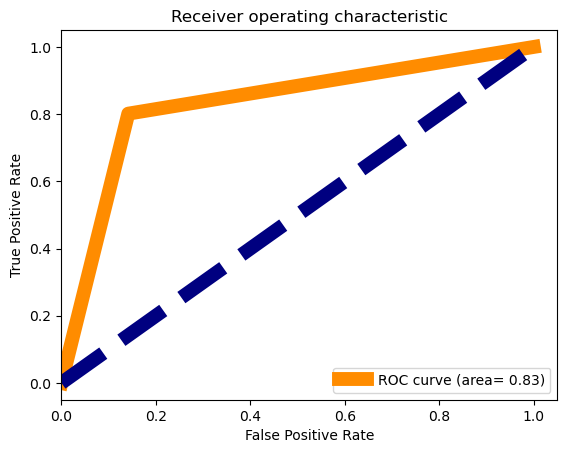

In [99]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(rf_pred, y_test)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=10,label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy', lw=10, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Saving the model

In [100]:
import joblib
joblib.dump(RF,'Project_Loan Status Prediction.pkl')

['Project_Loan Status Prediction.pkl']

# Predicting the saved model


In [101]:
import numpy as np
a=np.array(y_test)
predicted= np.array(RF.predict(x_test))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,1
...,...,...
249,1,1
250,0,0
251,0,1
252,0,0
